In [36]:
# Script imports
import cleanup
import utils
import pandas as pd

import utils
import final_account
import final_card
import final_client
import final_districts
import final_loans
import final_trans


test = False
accounts = final_account.cleanup()
card = final_card.cleanup(test)
clients = final_client.cleanup()
districts = final_districts.cleanup()
loans = final_loans.cleanup(test)
trans = final_trans.cleanup(test)
disp = pd.read_csv('../../project/banking_data/disp.csv', sep=';')




C:\Users\Hugo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [60]:
### Merge everything with sequel queries
from pandasql import sqldf

distrs = districts.rename(columns={"code ": "district_id"})
current = clients.merge(distrs, how='left', on="district_id")

## Merge Disp
## Mover para cleanup


# q1 = "SELECT * FROM disp WHERE Type='OWNER'"
# disp = sqldf(q1)
current = current.merge(disp, how='left', on="client_id")

current.head()


### Merge accounts
current = current.merge(accounts, how='left', on="account_id")
current = current.rename(columns={"date_x": "loan_date", "date_y" : "account_date"})

current.isnull().sum()

q1 = "SELECT *, MAX(date) FROM trans GROUP BY account_id; "
trans3 = sqldf(q1)
trans3
# ## Merge transactions
# trans2 = trans.rename(columns={"type": "trans_type" , "amount":"trans_ammount"})
current = current.merge(trans3, how='left', on="account_id")

current.isnull().sum()

df =  loans.merge(current, how='left', on="account_id")

df.isnull().sum()



loan_id                                              0
account_id                                           0
date                                                 0
amount_x                                             0
duration                                             0
payments                                             0
status                                               0
client_id                                            0
birth_number                                         0
gender                                               0
district_id_x                                        0
name                                                 0
region                                               0
no. of inhabitants                                   0
no. of municipalities with inhabitants < 499         0
no. of municipalities with inhabitants 500-1999      0
no. of municipalities with inhabitants 2000-9999     0
no. of municipalities with inhabitants >10000        0
no. of cit

In [2]:
df = cleanup.cleanup()
df = cleanup.normalize_category(df)

C:\Users\Hugo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [70]:
df.columns
df = cleanup.normalize_category(df)

In [71]:
### Drop columns not needed

# df2 = loans.drop(columns=['date'])
# df2 = utils.normalization(df2,'status')



df2 = df.drop(columns=['date','account_id','district_id_x','date_x','disp_id','client_id','birth_number','trans_id','date_x'])
df2 = utils.normalization(df2,'status')




NameError: name 'normalize_category' is not defined

In [68]:
### Split the model

from sklearn.model_selection import train_test_split

X = df2.drop(columns=['status'])
y = df2['status']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

len(X_test)


81

In [69]:
### Train the Model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)



ValueError: could not convert string to float: 'female'

In [7]:
model.score(X_test,y_test)

1.0

In [8]:
y_predicted = model.predict(X_test)

Text(69.0, 0.5, 'True')

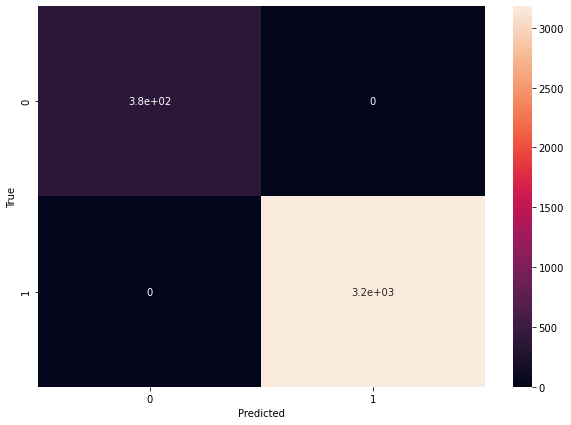

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')